# Ejercicio OpenStreetMap
Para este ejercicio vas a trabar con Overpass, que es la API que utiliza los datos de OpenStreetMap. Tras obtener datos geográficos mediante la API, tendrás que representarlos con Plotly.

Hay que obtener los siguientes datos de cada ubicación conseguida en OpenStreetMap
* tipo de amenity
* latitud
* longitud
* nombre
* direccion

**NOTA**: En este Notebook utilizarás gráficas de Plotly, y JupyterLab de momento no lo soporta, a no ser que instales una extensión. Para solucionar esto, abre el Notebook desde Jupyter normal:

![imagen](./img/jupyter.png)

Tienes en [este enlace](https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare) la lista de *amenities* que vas a usar en el notebook.

## Instalación
Si no tienes instalado Plotly, abre un terminal y escribe:
```
pip install plotly
```

Importa las librerias que vamos a usar en el Notebook

In [1]:
import requests
import json
import pandas as pd

Ataca a la API de OpenStreetmap con el siguiente código de ejemplo

In [2]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="ice_cream"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


Con el siguiente código podrás adaptar el JSON que devuelve la API, a un formato DataFrame más amigable

In [3]:
def json_to_df(data):
    elements = data['elements']
    places = {'tipo': [], 'lat': [], 'lon': [], 'name': [], 'address': []}
    
    for i in elements:
        
        tipo = i.get('tags', None).get('amenity', None)
        latitude = i.get('lat', None)
        longitude = i.get('lon', None)
        name = i.get('tags', {}).get('name', "NO NAME")
        street = i.get('tags', {}).get('addr:street', "NO STREET")
        number = i.get('tags', {}).get('addr:housenumber', 9999)

        places['tipo'].append(tipo)
        places['lat'].append(latitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(street + ' ' + str(number))

            
    return pd.DataFrame(places)

Utilizarás esta función para representar los datos en un mapa de Matplotlib

In [4]:
import plotly.express as px

mapbox_access_token = "pk.eyJ1IjoiZGFvcnRpIiwiYSI6ImNrZnF6M3FlczA3cDEyem16YTNzZmV4M2EifQ.846iF0sMSAXv0kwkwUTYjg"

def pinta_mapa(df):
    fig = px.scatter_mapbox(df,
                            lat="lat",
                            lon="lon",
                            color = "tipo",
                      color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=11)
    fig.update_layout(
        mapbox=dict(
            accesstoken=mapbox_access_token
        )
    )

    fig.show()

Como ejemplo, si quiero ver cuántos restaurantes tengo cerca de The Bridge:

In [5]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="restaurant"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()
df = json_to_df(data)
df

<Response [200]>


tipo        lat       lon                       name  \
0   restaurant  40.423086 -3.693547              La Castafiore   
1   restaurant  40.422607 -3.693256       Sake Dining Himawari   
2   restaurant  40.423315 -3.692506                     Ainhoa   
3   restaurant  40.421960 -3.694270                 La Kitchen   
4   restaurant  40.421956 -3.693905               En La Gloria   
5   restaurant  40.423695 -3.691651                Café Espejo   
6   restaurant  40.421951 -3.693535                      Tampu   
7   restaurant  40.422266 -3.694097                 Casa Gades   
8   restaurant  40.423151 -3.694062         El Cano de Xiquena   
9   restaurant  40.423345 -3.692632              El Gato Persa   
10  restaurant  40.422441 -3.694220           Cannibal Raw Bar   
11  restaurant  40.422395 -3.691137                  MasQMenos   
12  restaurant  40.421872 -3.690240                     Banzai   
13  restaurant  40.421130 -3.689796                   dokidoki   
14  restaurant  40.423600 -3.693725                       Luke   
15  restaurant  40.422141 -3.690864            Taberna Pedraza   
16  restaurant  40.422379 -3.689518                     Flavia   
17  restaurant  40.422151 -3.690570                  Al-Mounia   
18  restaurant  40.422777 -3.689781             SQD Meat Point   
19  restaurant  40.422991 -3.693652                Noteolvides   
20  restaurant  40.422255 -3.694251                      Merci   
21  restaurant  40.422576 -3.694493                 Mortadella   
22  restaurant  40.422081 -3.690748            New York Burger   
23  restaurant  40.421821 -3.689824                    Mestizo   
24  restaurant  40.420818 -3.688803                 Sushi Shop   
25  restaurant  40.422809 -3.694127  Restaurante la Buena Vida   
26  restaurant  40.422426 -3.693418                   Delirant   
27  restaurant  40.422211 -3.690702                   Pelotari   
28  restaurant  40.422235 -3.690743                El Pelotari   

                                 address  
0                         NO STREET 9999  
1                         NO STREET 9999  
2   Calle de Doña Bárbara de Braganza 12  
3                         NO STREET 9999  
4                        Calle de Prim 9  
5                         NO STREET 9999  
6                       Calle de Prim 13  
7           Calle del Conde de Xiquena 4  
8                         NO STREET 9999  
9   Calle de Doña Bárbara de Braganza 10  
10                Calle del Almirante 12  
11                        NO STREET 9999  
12                        NO STREET 9999  
13                        NO STREET 9999  
14   Calle de Doña Bárbara de Braganza 2  
15                  Calle de Recoletos 4  
16          Calle de Gil de Santivañes 2  
17                        NO STREET 9999  
18                 Calle de Villanueva 2  
19     Calle del Marqués de Monasterio 6  
20          Calle del Conde de Xiquena 3  
21                Calle del Almirante 11  
22                  Calle de Recoletos 4  
23                 Calle de Recoletos 13  
24                    Calle de Serrano 1  
25                        NO STREET 9999  
26                Calle del Almirante 20  
27                        NO STREET 9999  
28                        NO STREET 9999

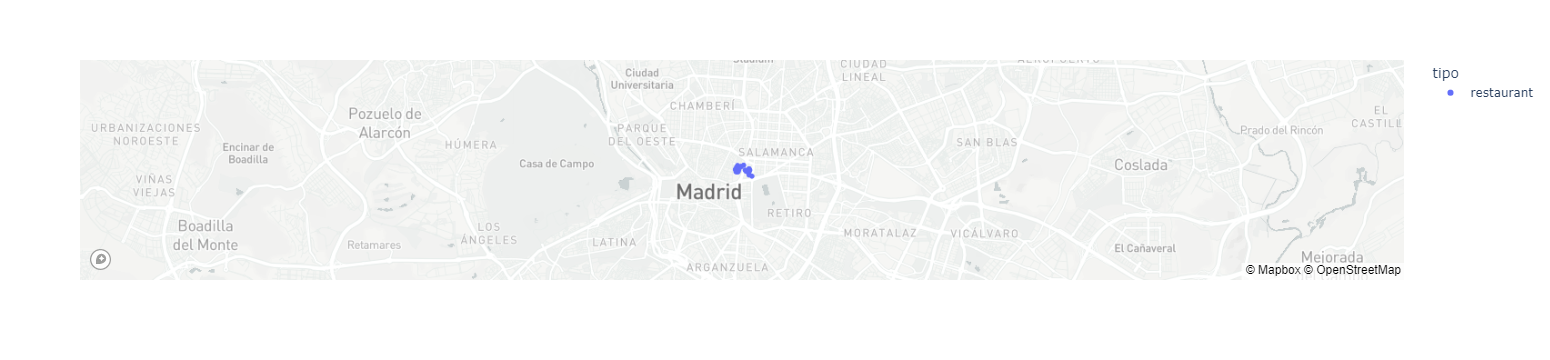

In [6]:
pinta_mapa(df)

## Ejercicio 1
### Búsqueda de aparcamiento
Para este caso de uso imagina que vas a Madrid de viaje y estás buscando posibles parkings donde dejar el coche, crea un DataFrame con todos los parkings (de OpenStreetMap) de la ciudad de Madrid. Para ello define una cuadrícula con dos coordenadas sobre Madrid.

Representa en un mapa los resultados

In [7]:
overpass_query = """
[out:json];
node["amenity"="parking"]
  (40.396013, -3.746999, 40.480011, -3.625910); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()
df = json_to_df(data)
df

<Response [200]>


tipo        lat       lon               name         address
0    parking  40.426712 -3.714370        Princesa 25  NO STREET 9999
1    parking  40.414469 -3.703549  Parking Benavente  NO STREET 9999
2    parking  40.406444 -3.708171            NO NAME  NO STREET 9999
3    parking  40.416691 -3.709364            NO NAME  NO STREET 9999
4    parking  40.447447 -3.627856            NO NAME  NO STREET 9999
..       ...        ...       ...                ...             ...
250  parking  40.413022 -3.663245            NO NAME  NO STREET 9999
251  parking  40.445740 -3.705060            NO NAME  NO STREET 9999
252  parking  40.432302 -3.719410  Parking Argüelles  NO STREET 9999
253  parking  40.454156 -3.694656            NO NAME  NO STREET 9999
254  parking  40.430475 -3.707778            NO NAME  NO STREET 9999

[255 rows x 5 columns]

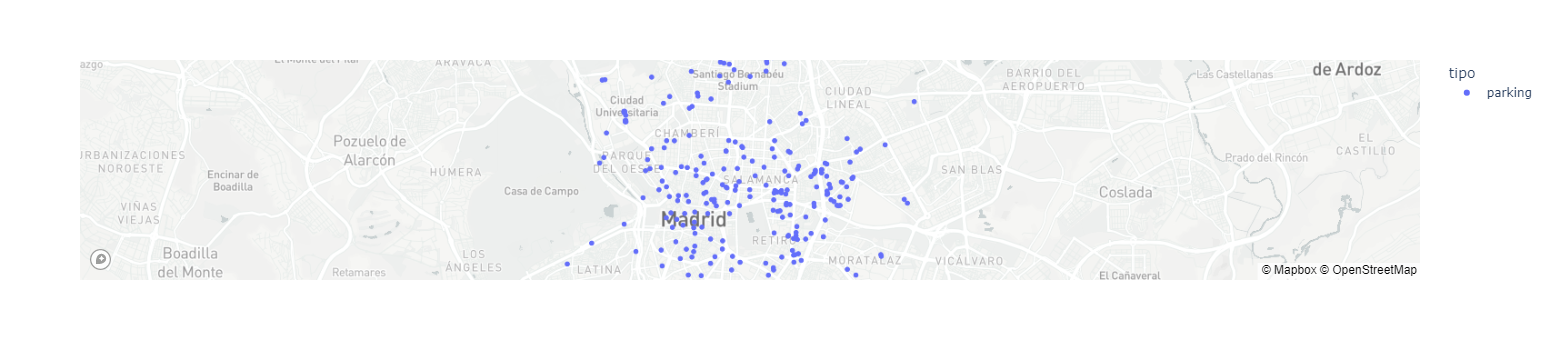

In [8]:
pinta_mapa(df)

## Mudanza
Imagina que te quieres mudar al Berrueco, pero antes te gustaría obtener algún indicador de si hay civilización por esa zona. Mira a ver si existe gasolineras y/o colegios por la zona. Define, al igual que en el caso anterior, un rectángulo mediante dos coordenadas. Busca la manera de realizar una única petición a la API.

Representa después en un mapa, por color los colegios y gasolineras

In [ ]:
overpass_query = """
[out:json];
node["amenity"="fuel"]
  (40.851838, -3.627774, 40.941457, -3.481755);
out;
node["amenity"="school"]
  (40.851838, -3.627774, 40.941457, -3.481755);
out;
"""

In [25]:
overpass_query = """
[out:json];
node["amenity"~"fuel|shool"]
  (40.851838, -3.627774, 40.941457, -3.481755);
out;
"""

In [26]:
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()
df = json_to_df(data)
df

<Response [200]>


tipo        lat       lon    name  \
0  fuel  40.905376 -3.607588  Repsol   
1  fuel  40.906677 -3.610172   Shell   
2  fuel  40.856872 -3.612894  Repsol   
3  fuel  40.875833 -3.602389   Shell   

                                             address  
0                                     NO STREET 9999  
1                           CTRA. N-I KM 64.650 9999  
2                         AVDA. GENERALISIMO,12 9999  
3  AVENIDA AVDA. DE LA CABRERA S/N JUNTO AL HOSTA...

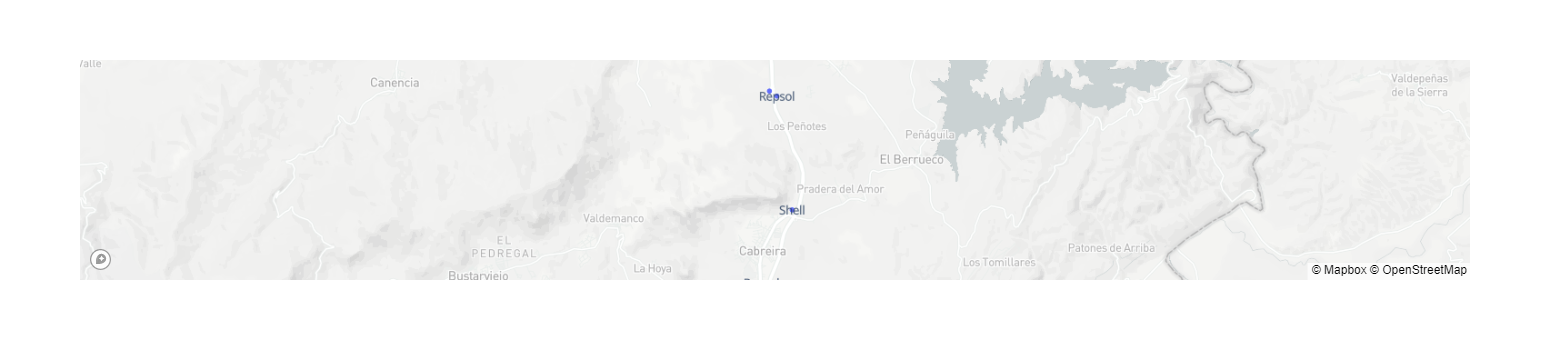

In [27]:
pinta_mapa(df)

## Zonas COVID
Imagina que trabajas en el ayuntamiento de tu barrio/pueblo/ciudad, y por motivos del COVID tienes que identificar:
1. Todas las zonas abiertas de uso común (zonas de barbacoas, fuentes de agua y parques infantiles (kindergarten)), para cerrarlas.
2. Todos los hospitales y clínicas de la zona.

Como no sabes muy bien qué puntos serán, utilizas la API de OpenStreetMap. Representa todo en un único mapa

In [13]:
overpass_query = """
[out:json];
node["amenity"="bbq"]
  (40.410505, -3.715351, 40.448860, -3.677615);
out;
node["amenity"="drinking_water"]
  (40.410505, -3.715351, 40.448860, -3.677615);
out;
node["amenity"="hospital"]
  (40.410505, -3.715351, 40.448860, -3.677615);
out;
node["amenity"="clinic"]
  (40.410505, -3.715351, 40.448860, -3.677615);
out;
node["amenity"="kindergarten"]
  (40.410505, -3.715351, 40.448860, -3.677615);
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()
df = json_to_df(data)
df

<Response [200]>


tipo        lat       lon  \
0    drinking_water  40.413707 -3.695723   
1    drinking_water  40.412405 -3.691392   
2    drinking_water  40.411579 -3.711331   
3    drinking_water  40.413810 -3.709083   
4    drinking_water  40.444679 -3.708382   
..              ...        ...       ...   
190    kindergarten  40.447935 -3.704028   
191    kindergarten  40.434118 -3.709672   
192    kindergarten  40.424440 -3.706083   
193    kindergarten  40.433793 -3.695049   
194    kindergarten  40.439107 -3.694977   

                                                name  \
0                                            NO NAME   
1                                            NO NAME   
2                                            NO NAME   
3                                            NO NAME   
4                                            NO NAME   
..                                               ...   
190                         Chiquitín Cuatro Caminos   
191  Escuela infantil municipal Fernando el Católico   
192                                      Family Moon   
193                              St. Alice's nursery   
194                                              TEO   

                               address  
0                       NO STREET 9999  
1                       NO STREET 9999  
2                       NO STREET 9999  
3                       NO STREET 9999  
4                       NO STREET 9999  
..                                 ...  
190                     NO STREET 9999  
191  Calle de Fernando el Católico 16B  
192                   Calle de Minas 6  
193    Calle de Fernández de la Hoz 21  
194                     NO STREET 9999  

[195 rows x 5 columns]

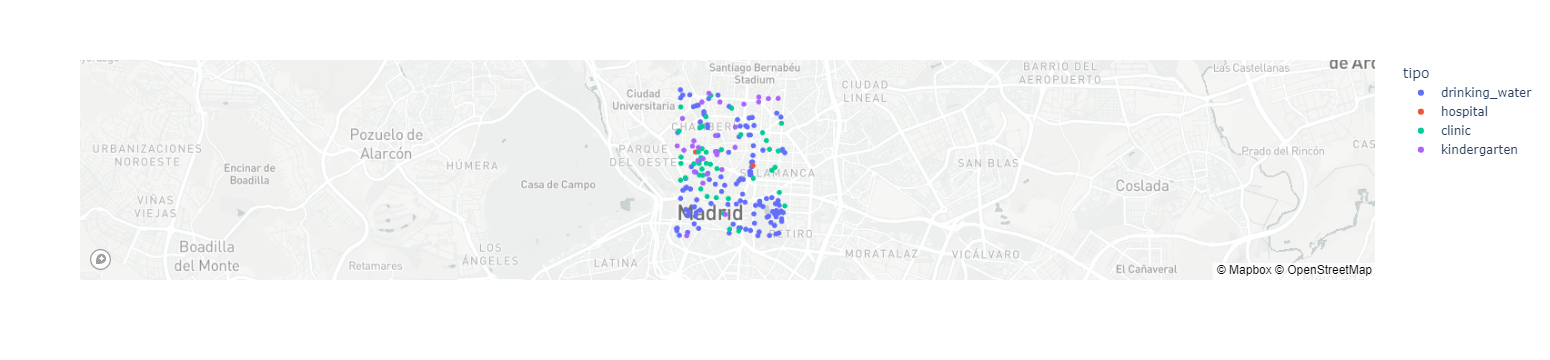

In [14]:
pinta_mapa(df)

## Supermercados
Para este ejemplo supondrás que trabajas en una cadena de supermercados en la que se está planteando construir un nuevo local en la provincia de Sevilla. Busca mediante la API de Overpass todos los supermercados de la provincia para poder comprobar en qué nucleos urbanos habría poca competencia.

En este caso hay que buscar por área, no por cuadrícula! Investiga en la documentación/Stackoverflow cómo se haría eso.

In [28]:
overpass_query = """
[out:json];
area[name="Sevilla"];
nwr[shop=supermarket](area);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()
df = json_to_df(data)
df

<Response [200]>


tipo        lat       lon         name  \
0    None  37.373002 -6.047204          MAS   
1    None  37.390016 -5.973769     Maxi Dia   
2    None  36.994532 -5.572320          Dia   
3    None  37.406364 -5.976342     El Jamón   
4    None  37.406508 -5.973342  Valdejimena   
..    ...        ...       ...          ...   
473  None        NaN       NaN         Aldi   
474  None        NaN       NaN    Mercadona   
475  None        NaN       NaN         Spar   
476  None        NaN       NaN    Mercadona   
477  None        NaN       NaN   Cash Fresh   

                                  address  
0                          NO STREET 9999  
1                          NO STREET 9999  
2                          NO STREET 9999  
3                          NO STREET 9999  
4    Avenida de San Juan de la Salle 9999  
..                                    ...  
473                Avenida Doctor Villa 1  
474                        NO STREET 9999  
475                       Calle Pío XII 1  
476                        NO STREET 9999  
477                        NO STREET 9999  

[478 rows x 5 columns]

In [29]:
df['tipo'] = df['tipo'].fillna("supermarket")
df = df.dropna()

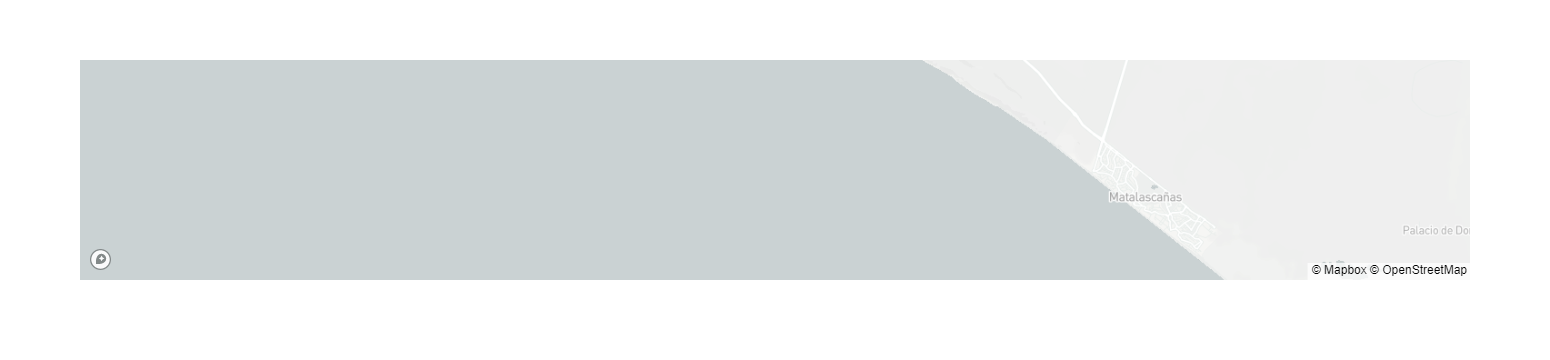

In [30]:
pinta_mapa(df)

## Etiqueta en el mapa
Busca la manera de modificar la función `pinta_mapa()`, de tal manera que cuando pases el ratón por encima de cada punto, aparezca el nombre de cada nodo. Por ejemplo, que en el último apartado aparezcan los nombres de los supermercados.

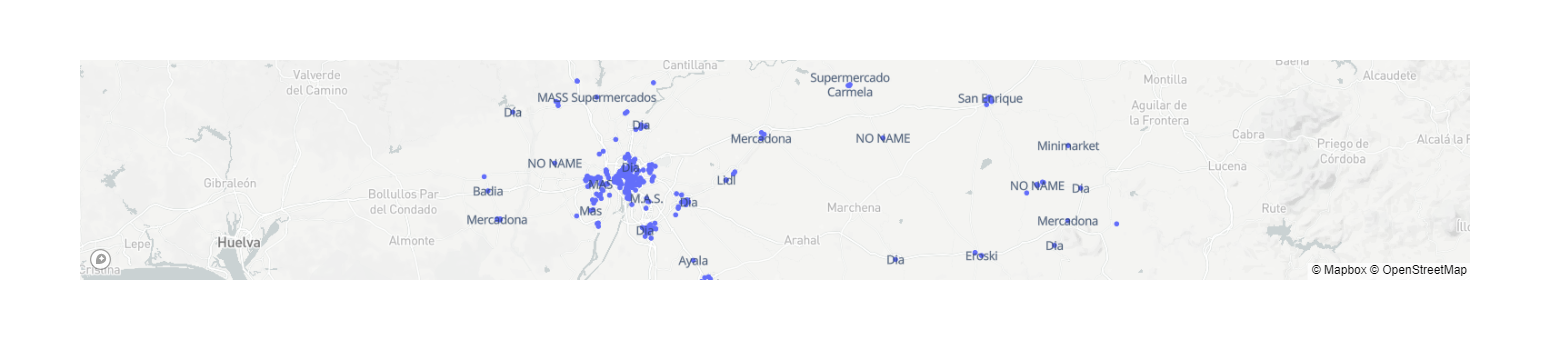

In [18]:
def pinta_mapa(df):
    fig = px.scatter_mapbox(df,
                            lat="lat",
                            lon="lon",
                            text = "name",
                      color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=11)
    fig.update_layout(
        mapbox=dict(
            accesstoken=mapbox_access_token
        )
    )

    fig.show()
pinta_mapa(df)